<a href="https://colab.research.google.com/github/amaar-dev/Movie-Tron/blob/main/Sentiment_Analyser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sentiment Analysing AI Model (reviews)


### Installation of necessary libraries

In [3]:
# import pandas, scikit-learn, matplotlib
!pip install pandas scikit-learn matplotlib

### Inspect dataset imdb 50k movie reviews


In [4]:
import pandas as pd
IMDB_data = pd.read_csv('/IMDB Dataset.csv')
print(IMDB_data.head())
print(IMDB_data['sentiment'].value_counts())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


### Text processing

In [5]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub('<.*?>', '', text) # clean tags
    text = re.sub('[^a-z ]', '', text) # only keep text
    text = re.sub(r'\s+', ' ', text).strip() # remove extra spaces if any
    return text

IMDB_data['clean_review'] = IMDB_data['review'].apply(clean_text) # create a new row clean text for processed text
print(IMDB_data['clean_review'].head(10))


0    one of the other reviewers has mentioned that ...
1    a wonderful little production the filming tech...
2    i thought this was a wonderful way to spend ti...
3    basically theres a family where a little boy j...
4    petter matteis love in the time of money is a ...
5    probably my alltime favorite movie a story of ...
6    i sure would like to see a resurrection of a u...
7    this show was an amazing fresh innovative idea...
8    encouraged by the positive comments about this...
9    if you like original gut wrenching laughter yo...
Name: clean_review, dtype: object


### Using sklearn train test split

In [6]:
from sklearn.model_selection import train_test_split

#

data = IMDB_data['clean_review']
value = IMDB_data['sentiment']

data_train, data_test, value_train, value_test = train_test_split(
    data,
    value,
    test_size=0.3,
    random_state=42
)

print(f"Training samples: {len(data_train)}")
print(f"Test samples: {len(data_test)}")

Training samples: 35000
Test samples: 15000


### Turn text to count

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer().fit(data_train) #initialise and create dict

train_reviews = vectorizer.transform(data_train)
test_reviews = vectorizer.transform(data_test)
# store count of words in reviews for both test and train elements

### Training our model


In [8]:
from sklearn.naive_bayes import MultinomialNB
sentiment_classifier = MultinomialNB() # assign variable to use model

# training using word count from countvectorizer (train_reviews) and the sentiment associated (value_train)
sentiment_classifier.fit(train_reviews, value_train)


MultinomialNB()

### Sentiment Detection Model evaluation

In [9]:
from sklearn.metrics import accuracy_score, classification_report

# Generate predictions on test data
test_predictions = sentiment_classifier.predict(test_reviews)

# Calculate and display accuracy
accuracy = accuracy_score(value_test, test_predictions)
print(f"Model Accuracy: {accuracy:.1%}")  # Formats as percentage with 1 decimal

# Generate and print detailed performance report
performance_report = classification_report(value_test, test_predictions)
print("\nDetailed Performance Report:")
print(performance_report)


Model Accuracy: 84.7%

Detailed Performance Report:
              precision    recall  f1-score   support

    negative       0.82      0.88      0.85      7411
    positive       0.87      0.82      0.84      7589

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000



### Testing a Review NOT in test_reviews

In [12]:
def predict_sentiment(text):
    cleaned = clean_text(text)
    vectorized = vectorizer.transform([cleaned])
    return sentiment_classifier.predict(vectorized)

print(predict_sentiment("hunger games is a good movie with a great casting and intriguing plot twists"))
print(predict_sentiment("The grudge is a cheap budget movie with average dialolgues"))


['positive']
['negative']


###A Barchart to represent sentiment distribution across the set


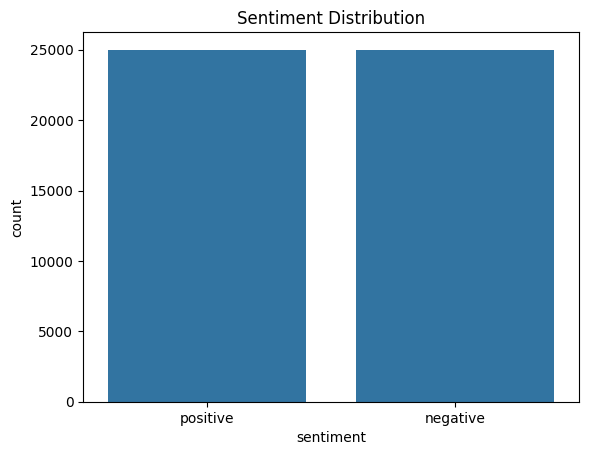

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='sentiment', data=IMDB_data)
plt.title("Sentiment Distribution")
plt.show()
